In [2]:
%matplotlib inline
import numpy as np
from scipy.special import sici
import matplotlib.pylab as plt
from scipy.integrate import quad, trapz

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


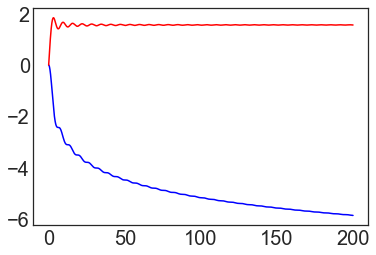

In [5]:
k_limit = 200
steps = 16386
k = np.linspace(0,k_limit,steps)
d = k_limit/(steps-1)
e = sici(k)
f_real = e[1]
f_imag = e[0]
f_real2 = f_real - np.log(k) - np.euler_gamma
plt.plot(k,f_real2,"b")
plt.plot(k,f_imag,"r")


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


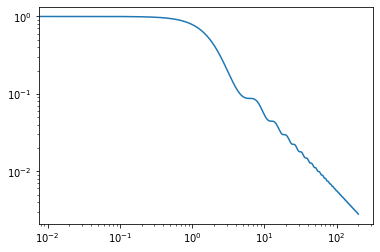

In [44]:
prefactor = 1
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
plt.loglog(k,er)

[-0.19997176 -0.11558898]


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


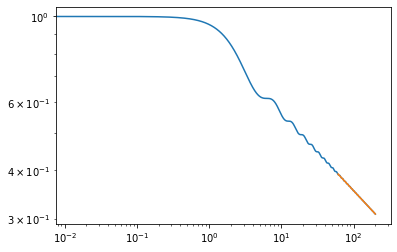

In [4]:
logk = np.log(k)
loger = np.log(er)
k_limit = 5000
p=np.polyfit(logk[k_limit:],loger[k_limit:],1)
print(p)
erfit = np.exp(p[1])*k**p[0]
plt.loglog(k,er)
plt.loglog(k[k_limit:],erfit[k_limit:])

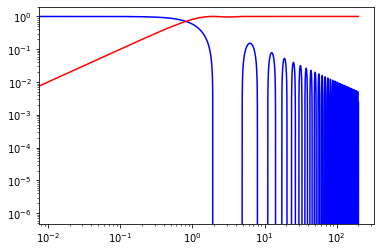

In [45]:
plt.loglog(k,ei1,"b")
plt.loglog(k,ei2,"r")

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later


(0.999876163450433-0.0019165419795925689j) (0.999876163450433+0.0019165419795925689j)
(32768,)
[25.81007239+0.j  5.52101095+0.j  3.00592912+0.j ...  2.43639087+0.j
  3.00539939+0.j  5.52048675+0.j]


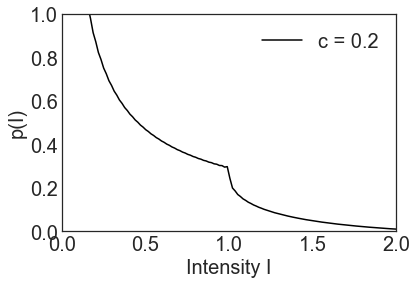

In [109]:
prefactor = np.pi/2*0.2
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(32768,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = np.conj(fc1)
fc = (fc1[:-1] + fc2[1:])/2
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[0] = 1.0
fc[-1] = np.real(fc[-1])
# make sure that
fc_c = np.conj(fc[::-1])
fc_t = np.concatenate((fc,fc_c[1:-1]))

print(fc_t[2],fc_t[-2])
print(fc_t.shape)

# take fourier transform and normalize to freq
cf_fft = 2*np.fft.fft(fc_t)/32768/freq[1]

print(cf_fft)
disp = 700
plt.plot(freq[:disp],np.real(cf_fft[:disp]),"k",label="c = 0.2")
plt.xlim((0,2))
plt.ylim((0,1))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.legend()
plt.savefig("pIanalytic02.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [100]:
# normalization
print(trapz(np.real(cf_fft[:steps]),dx=freq[1]))

0.9847135545352257


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later


(0.9992739410918159-0.006094988282176531j) (0.9992739410918159+0.006094988282176531j)
(32768,)
[0.55756665+0.j 0.5577455 +0.j 0.55783936+0.j ... 0.55721661+0.j
 0.55729657+0.j 0.55742001+0.j]


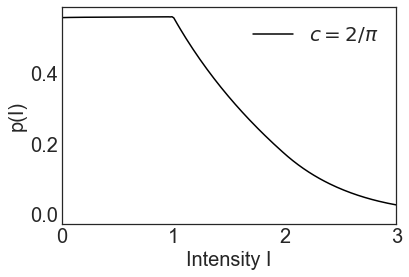

In [105]:
prefactor = 1
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(32768,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = np.conj(fc1)
fc = (fc1[:-1] + fc2[1:])/2
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[0] = 1.0
fc[-1] = np.real(fc[-1])
# make sure that
fc_c = np.conj(fc[::-1])
fc_t = np.concatenate((fc,fc_c[1:-1]))

print(fc_t[2],fc_t[-2])
print(fc_t.shape)

# take fourier transform and normalize to freq
cf_fft = 2*np.fft.fft(fc_t)/32768/freq[1]

print(cf_fft)
disp = 700
plt.plot(freq[:disp],np.real(cf_fft[:disp]),"k",label=r"$c = 2/\pi$")
plt.xlim((0,3))
#plt.ylim((0,500))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.legend()
plt.savefig("pIanalytic2overpi.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later


(0.9984259439349099-0.009563486978813904j) (0.9984259439349099+0.009563486978813904j)
(32768,)
[0.01321508+0.j 0.03754746+0.j 0.05948463+0.j ... 0.07503309+0.j
 0.05920969+0.j 0.03740663+0.j]


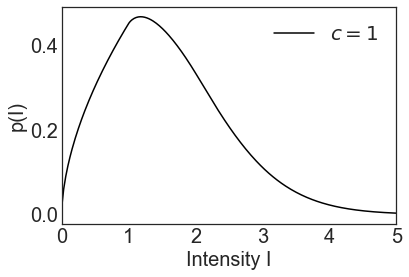

In [117]:
prefactor = np.pi/2*1
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(32768,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = np.conj(fc1)
fc = (fc1[:-1] + fc2[1:])/2
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[0] = 1.0
fc[-1] = np.real(fc[-1])
# make sure that
fc_c = np.conj(fc[::-1])
fc_t = np.concatenate((fc,fc_c[1:-1]))

print(fc_t[2],fc_t[-2])
print(fc_t.shape)

# take fourier transform and normalize to freq
cf_fft = 2*np.fft.fft(fc_t)/32768/freq[1]

print(cf_fft)
disp = 700
plt.plot(freq[:disp],np.real(cf_fft[:disp]),"k",label=r"$c = 1$")
plt.xlim((0,5))
#plt.ylim((0,500))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.legend()
plt.savefig("pIanalytic1.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later


(0.9684695615354277-0.046277405109194564j) (0.9684695615354277+0.046277405109194564j)
(32768,)
[-0.00386641+0.j -0.00385811+0.j -0.00384984+0.j ... -0.00389155+0.j
 -0.00388313+0.j -0.00387475+0.j]


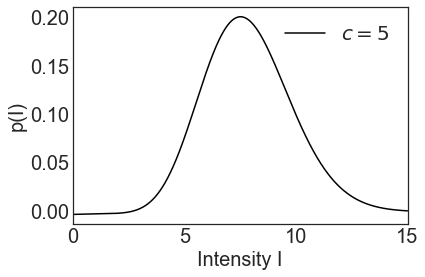

In [116]:
prefactor = np.pi/2*5
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(32768,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = np.conj(fc1)
fc = (fc1[:-1] + fc2[1:])/2
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[0] = 1.0
fc[-1] = np.real(fc[-1])
# make sure that
fc_c = np.conj(fc[::-1])
fc_t = np.concatenate((fc,fc_c[1:-1]))

print(fc_t[2],fc_t[-2])
print(fc_t.shape)

# take fourier transform and normalize to freq
cf_fft = 2*np.fft.fft(fc_t)/32768/freq[1]

print(cf_fft)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]),"k",label=r"$c = 5$")
plt.xlim((0,15))
#plt.ylim((0,500))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.legend()
plt.savefig("pIanalytic5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

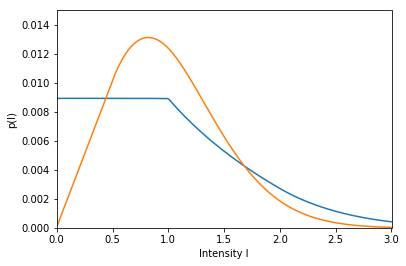

In [68]:
# Now lets compare two concentrations with two different brightness so that the total intensity is the same
plt.plot(I1,pI1)
plt.plot(I2*0.5,2*pI2)
plt.xlim((0,3))
plt.ylim((0,0.015))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo1and2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")